In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('Match_History_Details.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df.drop_duplicates(subset='GameId', inplace=True)

In [4]:
df.head()

,GameId,Duration,Team1_Barons,Team1_Dragons,Team2_Barons,Team2_Dragons,Team1_Player1_Champion,Team1_Player2_Champion,Team1_Player3_Champion,Team1_Player4_Champion,...,Team1_Player1_Lane,Team1_Player2_Lane,Team1_Player3_Lane,Team1_Player4_Lane,Team1_Player5_Lane,Team2_Player1_Lane,Team2_Player2_Lane,Team2_Player3_Lane,Team2_Player4_Lane,Team2_Player5_Lane
0,3084513429,1540,0,0,1,2,86,37,268,81,...,TOP,BOTTOM,MIDDLE,BOTTOM,JUNGLE,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM
1,3084446759,1642,0,4,1,0,99,29,23,113,...,BOTTOM,BOTTOM,TOP,JUNGLE,MIDDLE,BOTTOM,JUNGLE,JUNGLE,MIDDLE,BOTTOM
2,3084435694,1046,0,0,0,2,30,134,236,80,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,3083216368,1614,0,1,1,3,92,4,9,246,...,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM,BOTTOM,JUNGLE,MIDDLE,BOTTOM,TOP
4,3083201609,1444,1,2,0,0,15,350,113,61,...,BOTTOM,BOTTOM,JUNGLE,MIDDLE,TOP,JUNGLE,BOTTOM,TOP,MIDDLE,BOTTOM


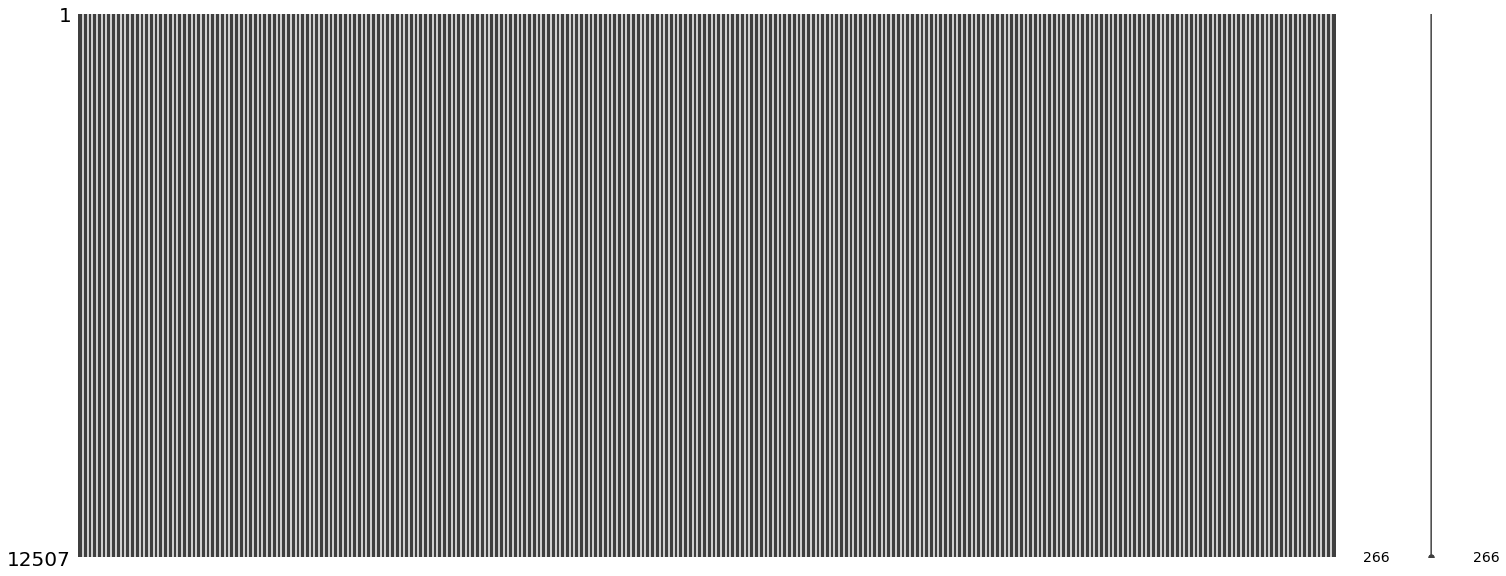

In [5]:
# To see if I am missing any info in my data, I use MissingNo to validate I have all the info in my data
msno.matrix(df)

Creating a function to pull out the necessary columns to cluster on for each lane. Since each lane contains 10 players, I am going to iterate through each player column to pull up the necessary info and overlay all the info into consolidated columns

In [6]:
def lane(lane_name):
    players = ['Team1_Player1', 'Team1_Player2', 'Team1_Player3', 'Team1_Player4', 'Team1_Player5',
              'Team2_Player1', 'Team2_Player2', 'Team2_Player3', 'Team2_Player4', 'Team2_Player5']

    df2 = pd.DataFrame()
    for player in players:
        rift = df.query("{}_Lane == '{}'".format(player, lane_name))[
            ['{}_Lane'.format(player), '{}_Summoner'.format(player), '{}_Champion'.format(player),
            '{}_Kills'.format(player), '{}_Deaths'.format(player),'{}_Assists'.format(player), 
             '{}_Killing_Spree'.format(player), '{}_Multikills'.format(player), '{}_Total_Damage'.format(player),
             '{}_Damage_To_Objectives'.format(player), '{}_Damage_To_Turrets'.format(player), 
             '{}_Damage_Taken'.format(player), '{}_Gold_Earned'.format(player), '{}_Champ_Level'.format(player),
             '{}_Wards_Bought'.format(player), '{}_Vision_Score'.format(player), '{}_Crowd_Control'.format(player),
             '{}_Item0'.format(player),'{}_Item1'.format(player),'{}_Item2'.format(player), '{}_Item3'.format(player),
             '{}_Item4'.format(player), '{}_Item5'.format(player), '{}_Item6'.format(player)]]
        rift.rename(columns = {"{}_Lane".format(player): "Lane", 
                              "{}_Champion".format(player): "Champion",
                              "{}_Summoner".format(player): "Summoner",
                              "{}_Kills".format(player): "Kills",
                              "{}_Deaths".format(player): "Deaths", 
                              "{}_Assists".format(player): "Assists", 
                              "{}_Killing_Spree".format(player): "Killing_Spree",
                              "{}_Multikills".format(player): "Multikills",
                              "{}_Total_Damage".format(player): "Total_Damage",
                              "{}_Damage_To_Objectives".format(player): "Damage_To_Objectives", 
                              "{}_Damage_To_Turrets".format(player): "Damage_To_Turrets",
                              "{}_Damage_Taken".format(player): "Damage_Taken",
                              "{}_Gold_Earned".format(player): "Gold_Earned",
                              "{}_Champ_Level".format(player): "Champ_Level",
                              "{}_Wards_Bought".format(player): "Wards_Bought",
                              "{}_Vision_Score".format(player): "Vision_Score",
                              "{}_Crowd_Control".format(player): "Crowd_Controls", 
                              "{}_Item0".format(player): "Item_0",
                              "{}_Item1".format(player): "Item_1",
                              "{}_Item2".format(player): "Item_2",
                              "{}_Item3".format(player): "Item_3",
                              "{}_Item4".format(player): "Item_4",
                              "{}_Item5".format(player): "Item_5",
                              "{}_Item6".format(player): "Item_6",}, inplace = True)
        df2 = pd.concat([df2,rift])
    return df2

In [7]:
top = lane('TOP')
jungle = lane('JUNGLE')
middle = lane('MIDDLE')
bot = lane('BOTTOM')
support = lane('NONE')

### Grouping by lane assignment does not accurately give the proper data segmentation due to the nature of role swaps in champion select. Grouping by lane assignments still gives a wide variety of champions in each role which is not consistent with how the game is actually played. 

### By getting the champion name data into the overall dataframe, I can filter out lanes by looking at the champion played and where that champion "SHOULD" be played. This is not a perfect solution but is much better than relying on the lane assignment data

In [10]:
champion_names = 'http://ddragon.leagueoflegends.com/cdn/9.13.1/data/en_US/champion.json?fbclid=IwAR3wpqEjCmWqLKToVoMwWz-iGVCkHaVVfVOWtvy9OpfKrM7Hjt1YZ4VyPk8'

In [12]:
df = pd.read_json(champion_names)

In [13]:
champs = []
ids = []
for names in list(df['data']):
    champs.append(names['id'])
    ids.append(names['key'])

In [14]:
champ_dict = {}

for champ in range(len(champs)):
    champ_dict[ids[champ]] = champs[champ]

In [26]:
# There are 145 champions in the game as of 7/30/2019
len(champ_dict.keys())

145

In [55]:
# Was initially 'MonkeyKing'
champ_dict['62'] = 'Wukong'

In [56]:
champ_dict.values()

dict_values(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'DrMundo', 'Draven', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin', 'Leona', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'Wukong', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze'

In [21]:
all_matches = pd.concat([top, jungle, middle, bot, support])

In [23]:
all_matches['champion_name'] = all_matches['Champion'].map(lambda x: champ_dict[str(x)] )

In [79]:
top = all_matches[all_matches['champion_name'].isin(['Aatrox', 'Kled', 'Renekton', 'Darius', 'Riven', 'Illaoi',
                                              'Vladimir', 'Mordekaiser', 'Fiora', 'Jax', 'Gangplank', 'Pantheon', 
                                              'Rengar', 'Teemo', 'Kennen', 'Camille', 'Yorick', 'Poppy', 'Kayle',
                                              'Olaf', 'Rumble', 'Quinn', 'Irelia', 'Jayce', 'Tryndamere', 'Ornn', 
                                              'Volibear', 'Shen', 'Nasus', 'Chogath', 'Heimerdinger', 'Swain',
                                              'Urgot', 'Malphite', 'Sion', 'Gnar', 'Singed', 'DrMundo', 'Maokai', 'Garen'])]

In [80]:
top.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,champion_name
0,TOP,yg3qpH1LSRyaIj4upID3RlUiQo3X_n3abZQ4TYRTquUEUQ,86,4,3,9,3,1,12374,3836,...,12,31,3512,1031,1028,0,3071,3047,3340,Garen
3,TOP,qh2UCzLr-OBGB8sqUmErf7OVljvHFHHdeT6buVsh9ezrY58,92,9,7,1,4,1,15022,3893,...,20,26,3812,3071,1037,1053,3047,1036,3340,Riven
11,TOP,yimetSwPS-curk6lVVCElRNYeHOetN7EH22mmijnZfWvlE0,39,6,10,3,3,2,17448,3386,...,19,10,1057,3748,2033,3053,3078,3047,3340,Irelia
25,TOP,7lLRCTZyx_eBwsflVetX3F_qS0CB24okxzsx5oy6ibLN6Q,266,4,8,3,0,1,18326,12718,...,26,19,3812,2055,3047,3071,3211,3067,3340,Aatrox
30,TOP,7ErMWC9C787xc7FsCIBgZ1yBZqFWVyg0XxPwewBcDxihxqY,31,3,4,2,3,1,13311,1453,...,13,66,3800,3512,2031,3111,1082,3067,3340,Chogath


In [58]:
jungle = all_matches[all_matches['champion_name'].isin(['Elise', 'Evelynn', 'Karthus', 'JarvanIV', 'XinZhao', 'LeeSin',
                                              'Nidalee', 'RekSai', 'Kayn', 'Rammus', 'Sylas', 'Gragas', 'Sejuani',
                                              'Nunu', 'Zac', 'Hecarim', 'Vi', 'Kindred', 'MasterYi', 'Taliyah',
                                              'Graves', 'Shaco', 'Warwick', 'Shyvana', 'Fiddlesticks', 'Khazix', 
                                              'Amumu', 'Skarner', 'Ivern', 'Udyr', 'Nocturne', 'Trundle', 'Wukong'])]

In [59]:
jungle.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,champion_name
180,TOP,F41M05i62Nw1lVrfd1atluY4fYqtLMtRzAMixBVlfhW6vQ,517,6,3,15,3,1,29163,9691,...,27,27,3157,3152,3041,3020,0,3165,3340,Sylas
390,TOP,Jnbw-1I952Djdf8kNGadDSDnkdlUg1e621a66i-HAHKrhDQ,163,4,4,11,2,1,9796,11092,...,30,8,2033,3108,3285,2421,3111,3191,3340,Taliyah
590,TOP,KuDBl7qecJa2Y7EW5SRh9J2XcoQ4m69KViKrsDztgjM111Y,517,4,9,5,2,1,6648,3168,...,15,10,3165,3152,3157,0,3020,1082,3340,Sylas
699,TOP,xWebl5F8VNrkYlsZlc4dMmnJxIPhYJ4AUP_nQXDYZaVpZw,104,7,4,5,4,1,22269,11399,...,16,15,1055,3812,0,3111,3071,3046,3340,Graves
846,TOP,58KXtoMDsQgPU0GMrrv2po1_whZv4tqkUeE94SrH_CXUhg,517,4,7,6,2,1,18760,12753,...,32,25,2421,3152,2033,3285,3111,3191,3363,Sylas


In [61]:
middle = all_matches[all_matches['champion_name'].isin(['Talon', 'Fizz', 'Zed', 'Ahri', 'Malzahar', 'Qiyana', 'Katarina',
                                              'Yasuo', 'Zoe', 'Kassadin', 'Diana', 'Anivia', 'TwistedFate', 
                                              'Neeko', 'Cassiopeia', 'Annie', 'Corki', 'AurelionSol', 'Ekko', 
                                              'Leblanc', 'Orianna', 'Akali', 'Ryze', 'Xerath', 'Veigar', 'Azir',
                                              'Syndra', 'Viktor', 'Lissandra', 'Ziggs'])]

In [62]:
middle.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,champion_name
8,TOP,xZllBInoF5UYOeC_J6ajwRfaQVXhWuT3MKuQcst6XQcX_g,518,3,6,4,2,1,16640,19544,...,18,25,1018,3153,3006,3123,3085,1037,3340,Neeko
14,TOP,pABgmovHF4o0fkvV07C0tyAMO4ohie9lgkV3kNymHXscIS...,13,4,3,8,2,2,13014,7945,...,15,12,3040,3907,0,0,0,3158,3340,Ryze
65,TOP,mYXAG2pxtnLB2OL1J07x1YS0e37PkCmtsOlS9PHdcu_jL40,268,7,6,7,2,1,27212,5089,...,22,12,1058,3157,3115,1058,3020,3135,3363,Azir
107,TOP,CdvbZGOaUL2ZdkQ2q_sN7Dfj6U-j43AIvQNMfgxYz5E26X...,42,4,6,3,3,2,21081,4272,...,25,0,3020,3031,0,3078,3046,0,3363,Corki
243,TOP,dBRVgXQf7y-HECfH7u5uhFgocl8ELZvnFa6JuMhoTgngAA,136,3,2,2,2,1,5804,0,...,7,10,2033,1082,3020,3027,3116,2055,3340,AurelionSol


In [64]:
bot = all_matches[all_matches['champion_name'].isin(['Sivir', 'Kaisa', 'Jinx', 'Ezreal', 'Vayne', 'Ashe', 'Caitlyn',
                                              'Xayah', 'Lucian', 'Draven', 'Jhin', 'Twitch', 'Tristana',
                                              'MissFortune', 'Varus', 'Kogmaw', 'Kalista'])]

In [65]:
bot.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,champion_name
554,TOP,Pm3GFo04o5gj3Ct9yFsjwfvrz8QWIG750Y4mzumxKmhOUA,119,8,6,15,4,1,28325,8280,...,22,15,3140,3072,3006,3123,3031,3046,3363,Draven
1102,TOP,44fwomXKRT3ye4MxYQnSkdd_G10jAEiKehI5znAqpgBa_fM,67,3,3,11,2,1,20254,16638,...,29,10,3006,3153,1043,3091,3123,3155,3363,Vayne
1244,TOP,3zpm-3zetBtA_8nf5rxE2ZZcjtMR1N4HZ0BhFuSyy4KI9TY,236,0,4,4,0,0,11980,6513,...,10,1,3153,3071,1055,1004,1042,3111,3363,Lucian
1725,TOP,kiq034f-7PrPC4gXBLl5n3UAmJpvGzr7-ydgeLEyM9weW4...,29,9,7,16,4,2,30826,21118,...,33,22,3153,3085,3046,3031,3006,1033,3340,Twitch
1901,TOP,mkzKhjzVuVGSC3l8c_fpPmFNVbdTA7bMVFMvsmxKuHtoPg,15,2,6,6,0,1,12657,2828,...,11,0,3087,1055,3006,3508,1037,0,3363,Sivir


In [71]:
support = all_matches[all_matches['champion_name'].isin(['Pyke', 'Thresh', 'Nautilus', 'Blitzcrank', 'Leona', 'Morgana',
                                              'Bard', 'Karma', 'Yuumi', 'Lux', 'Janna', 'Zilean', 'Lulu', 'Zyra',
                                              'Rakan', 'Nami', 'Soraka', 'Velkoz', 'Alistar', 'Brand', 'Taric',
                                              'Sona', 'TahmKench', 'Braum', 'Galio'])]

In [72]:
support.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,champion_name
361,TOP,t8vdTfp3opWjJAzFdEZK_aIMqDNJFpfUQUc9bqqfAqJYHg,99,2,4,33,0,1,11761,3071,...,75,61,3098,3222,3107,3504,3117,1026,3364,Lux
397,TOP,Oa73sgQjlcCTWQJz2i7LjZicDPgkjp2PPyaLF_RH4MQgAL0,43,6,8,8,2,1,19492,8364,...,21,40,3174,3285,2421,3191,3504,3020,3340,Karma
412,TOP,iOIjWZ8Olzb3zKxlaZMHD8bWCb7aGFcWM5L1vjThJ6UfDMo,43,2,4,3,0,1,13859,148,...,14,29,1056,3027,3111,3916,0,3041,3340,Karma
489,TOP,F41M05i62Nw1lVrfd1atluY4fYqtLMtRzAMixBVlfhW6vQ,43,4,2,10,3,1,19515,10652,...,14,25,2055,3174,3285,1056,3089,3020,3364,Karma
608,TOP,F2-RIJW-55jLB-xRRQzZSonMdQWsPLZ5VVxiODCSNIkZQpk,43,5,8,9,2,1,15718,1316,...,26,35,3030,2033,3905,3916,3020,1026,3340,Karma


In [82]:
# Sanity Check:

len(set(['Pyke', 'Thresh', 'Nautilus', 'Blitzcrank', 'Leona', 'Morgana', 'Bard', 'Karma', 'Yuumi', 'Lux', 
         'Janna', 'Zilean', 'Lulu', 'Zyra', 'Rakan', 'Nami', 'Soraka', 'Velkoz', 'Alistar', 'Brand', 'Taric',
        'Sona', 'TahmKench', 'Braum', 'Galio', 'Sivir', 'Kaisa', 'Jinx', 'Ezreal', 'Vayne', 'Ashe', 'Caitlyn',
        'Xayah', 'Lucian', 'Draven', 'Jhin', 'Twitch', 'Tristana', 'MissFortune', 'Varus', 'Kogmaw', 'Kalista',
         'Talon', 'Fizz', 'Zed', 'Ahri', 'Malzahar', 'Qiyana', 'Katarina', 'Yasuo', 'Zoe', 'Kassadin', 'Diana', 
         'Anivia', 'TwistedFate', 'Neeko', 'Cassiopeia', 'Annie', 'Corki', 'AurelionSol', 'Ekko', 
        'Leblanc', 'Orianna', 'Akali', 'Ryze', 'Xerath', 'Veigar', 'Azir', 'Syndra', 'Viktor', 'Lissandra', 
         'Ziggs', 'Elise', 'Evelynn', 'Karthus', 'JarvanIV', 'XinZhao', 'LeeSin', 'Nidalee', 'RekSai', 'Kayn', 
         'Rammus', 'Sylas', 'Gragas', 'Sejuani', 'Nunu', 'Zac', 'Hecarim', 'Vi', 'Kindred', 'MasterYi', 'Taliyah',
        'Graves', 'Shaco', 'Warwick', 'Shyvana', 'Fiddlesticks', 'Khazix', 'Amumu', 'Skarner', 'Ivern', 'Udyr', 
         'Nocturne', 'Trundle', 'Wukong', 'Aatrox', 'Kled', 'Renekton', 'Darius', 'Riven', 'Illaoi',
        'Vladimir', 'Mordekaiser', 'Fiora', 'Jax', 'Gangplank', 'Pantheon','Rengar', 'Teemo', 'Kennen', 
         'Camille', 'Yorick', 'Poppy', 'Kayle', 'Olaf', 'Rumble', 'Quinn', 'Irelia', 'Jayce', 'Tryndamere', 'Ornn', 
        'Volibear', 'Shen', 'Nasus', 'Chogath', 'Heimerdinger', 'Swain', 'Urgot', 'Malphite', 'Sion', 
         'Gnar', 'Singed', 'DrMundo', 'Maokai', 'Garen']))

145

In [83]:
top.to_csv('Top_lane.csv')
jungle.to_csv('Jungle.csv')
middle.to_csv('Mid_lane.csv')
bot.to_csv('Bot_lane.csv')
support.to_csv('Support.csv')